In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pickle

from tqdm import tqdm 

import os

from inxss import PsiMask

In [2]:
map_path = '/pscratch/sd/z/zhantao/inxs_steering/La2NiO4_bool'
grid_info = {
    'h_grid': [-3., 3., 90],
    'k_grid': [-3., 3., 90],
    'l_grid': [-15., 15., 60],
    'w_grid': [1., 200., 100]
}

In [3]:
with open(f'{map_path}/metadata', 'rb') as f:
    metadata = pickle.load(f)
print(metadata.keys())

dict_keys(['h_grid', 'k_grid', 'l_grid', 'w_grid'])


In [4]:
psi_mask = PsiMask(map_path, device='cpu', preload=False)

In [5]:
mask_full = psi_mask.load_mask(25)

Text(0, 0.5, 'k')

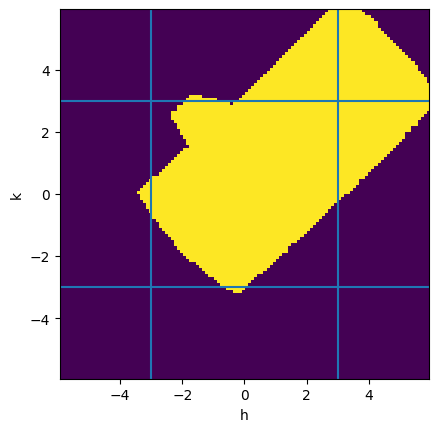

In [6]:
shrink_factor = 0.4
plt.imshow((mask_full.sum(dim=-1).sum(dim=-1) > 0).T,
           extent=[psi_mask.h_grid.min(), psi_mask.h_grid.max(), psi_mask.k_grid.min(), psi_mask.k_grid.max()],
           origin='lower'
          )
plt.vlines([grid_info['h_grid'][0], grid_info['h_grid'][1]], psi_mask.h_grid_src[0], psi_mask.h_grid_src.max())
plt.hlines([grid_info['k_grid'][0], grid_info['k_grid'][1]], psi_mask.k_grid_src[0], psi_mask.k_grid_src.max())
plt.xlabel('h')
plt.ylabel('k')

In [7]:
psi_mask_crop = PsiMask(map_path, grid_info, device='cpu', preload=False)
mask_crop = psi_mask_crop.load_mask(25)

obtained memmap mask name as: mask_h__k__l__w_.npy
mask memmap not found, you might want to build from scratch (typically ~10 mins)...


Text(0, 0.5, 'k')

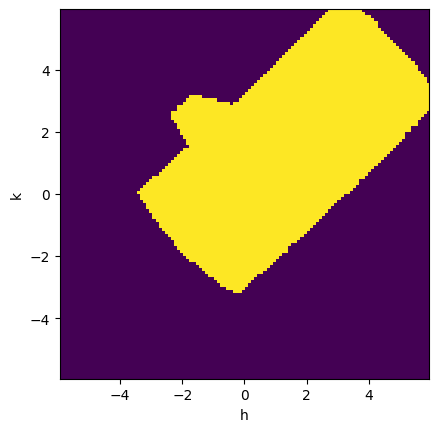

In [8]:
plt.imshow(
    (mask_crop.sum(dim=-1).sum(dim=-1) > 0).T,
    extent=[psi_mask_crop.h_grid.min(), psi_mask_crop.h_grid.max(), psi_mask_crop.k_grid.min(), psi_mask_crop.k_grid.max()],
    origin='lower'
)
plt.xlabel('h')
plt.ylabel('k')

In [9]:
with open(f'{map_path}/25.pkl', 'rb') as f:
    _tmp_data = pickle.load(f)

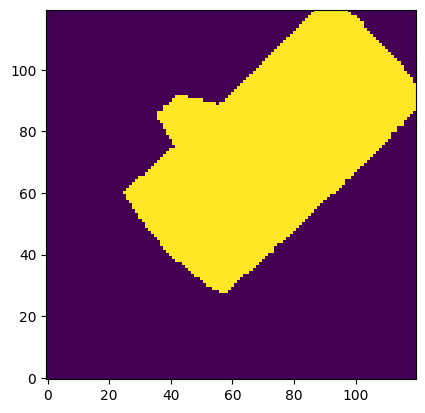

In [10]:
plt.imshow((_tmp_data['coverage'].sum(axis=-1).sum(axis=-1) > 0).T, origin='lower')

In [13]:
psi_mask_memmap = PsiMask(map_path, memmap_mask_path='/pscratch/sd/z/zhantao/inxs_steering/mask_data',
                          grid_info=grid_info, device='cpu', preload=False)

obtained memmap mask name as: mask_h_-3.0_3.0_90_k_-3.0_3.0_90_l_-15.0_15.0_60_w_1.0_200.0_100.npy


In [18]:
%timeit psi_mask_memmap.load_memmap_mask(15)

20.4 ms ± 95.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


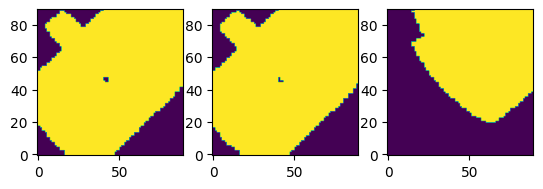

In [29]:
fig, ax = plt.subplots(1,3)
ax[0].imshow((psi_mask_memmap.mask_memmap[0].sum(axis=-1).sum(axis=-1)>1).T, origin='lower')
ax[1].imshow((psi_mask_memmap.mask_memmap[-1].sum(axis=-1).sum(axis=-1)>1).T, origin='lower')
ax[2].imshow((psi_mask_memmap.load_memmap_mask(65).sum(axis=-1).sum(axis=-1)>1).T, origin='lower')

In [19]:

mask_complete = np.zeros(
    [360,] + [grid_info[key][-1] for key in ['h_grid', 'k_grid', 'l_grid', 'w_grid']], dtype=bool)


In [22]:
for i in tqdm(range(360)):
    mask_complete[i] = psi_mask_crop.load_mask(i)

100%|██████████| 360/360 [15:04<00:00,  2.51s/it]


In [33]:
values

[1.0, 200.0, 100]

In [37]:
filename_parts = []
for key, values in grid_info.items():
    prefix = key.split('_')[0]  # Take the first part of the key (like "h" from "h_grid")
    
    # Format values: if it's a float, format to 1 decimal point; else, convert to string
    values_str = "_".join([f"{v:.1f}" if isinstance(v, float) else str(v) for v in values])
    
    filename_parts.append(f"{prefix}_{values_str}")

filename = "mask_" + "_".join(filename_parts) + ".npy"
print(filename)

mask_h_-3.0_3.0_90_k_-3.0_3.0_90_l_-15.0_15.0_60_w_1.0_200.0_100.npy


In [40]:
np.save(os.path.join('/pscratch/sd/z/zhantao/inxs_steering/mask_data', filename), mask_complete)


In [41]:
mmap_array = np.load(os.path.join('/pscratch/sd/z/zhantao/inxs_steering/mask_data', filename), mmap_mode='r')

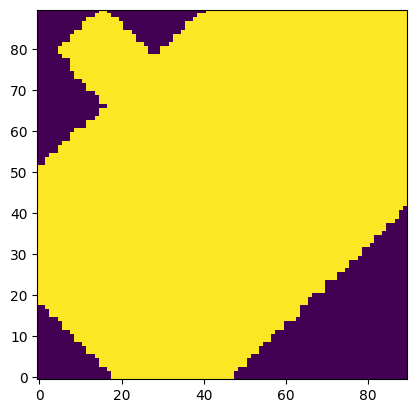

In [51]:
loaded_mask = np.array(mmap_array[5])

plt.imshow((loaded_mask.sum(axis=-1).sum(axis=-1) > 0).T, origin='lower')

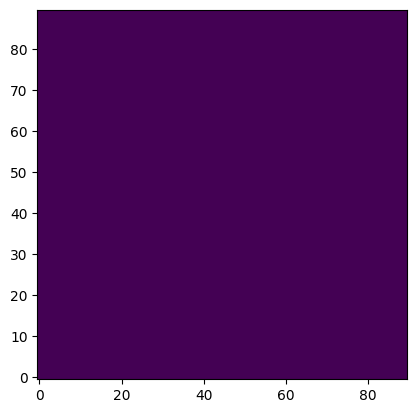

In [50]:
loaded_mask = loaded_mask * 0.

plt.imshow((loaded_mask.sum(axis=-1).sum(axis=-1) > 0).T, origin='lower')